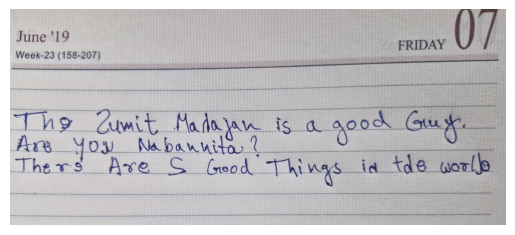

In [2]:
image_path = '/content/handwriting.jpg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Saving handwriting.jpg to handwriting.jpg


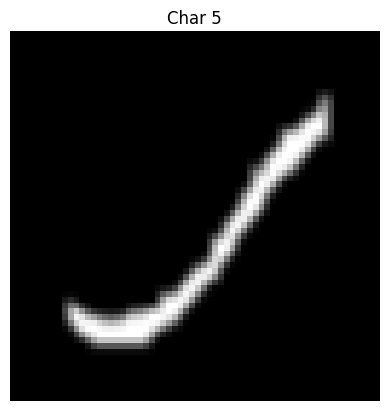

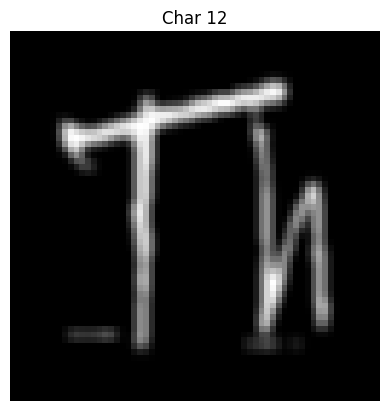

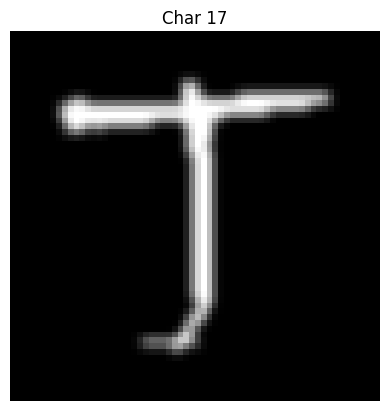

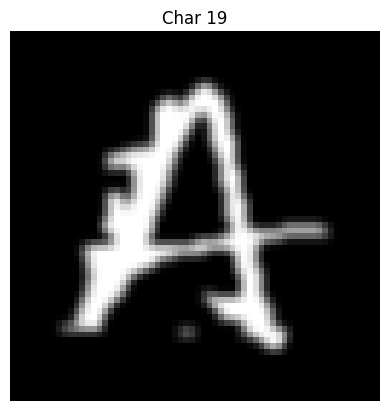

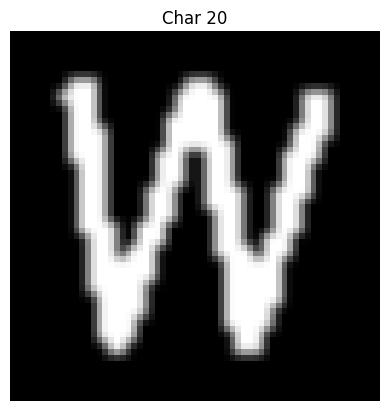

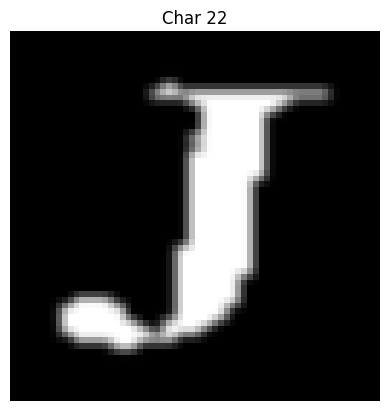

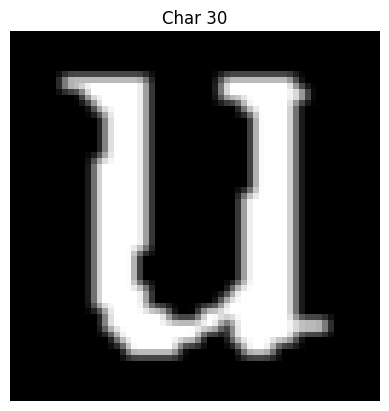

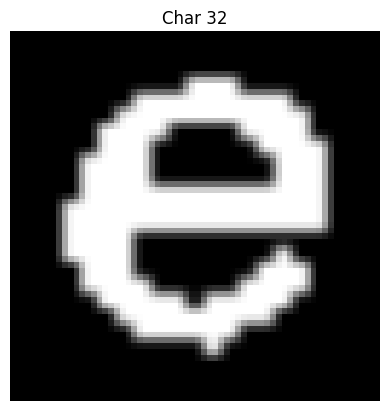

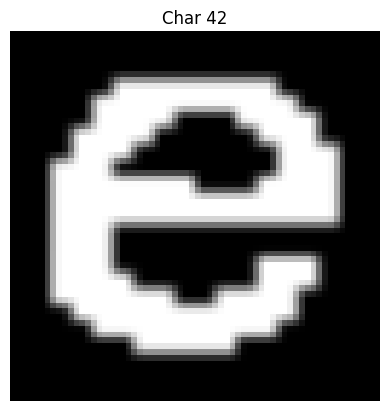

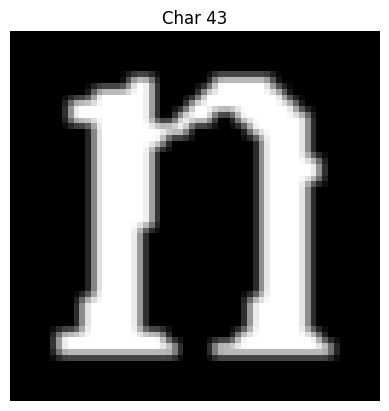

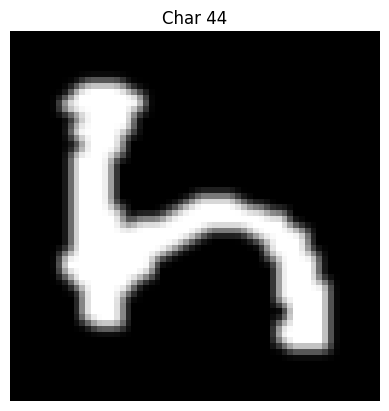

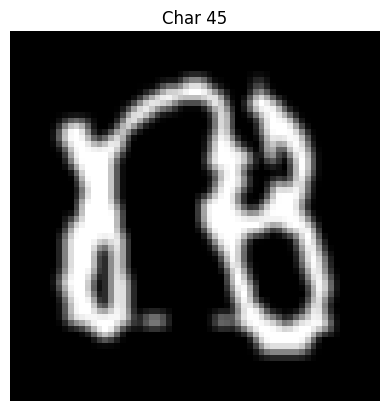

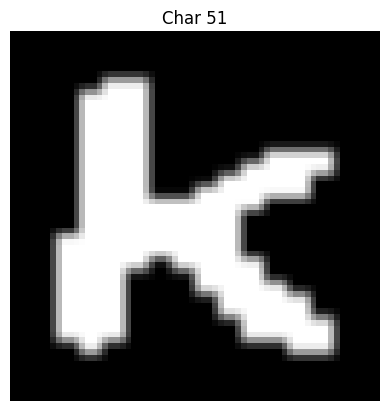

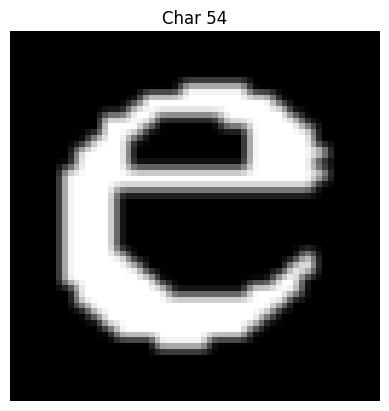

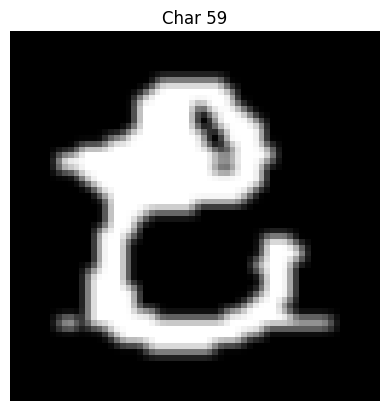

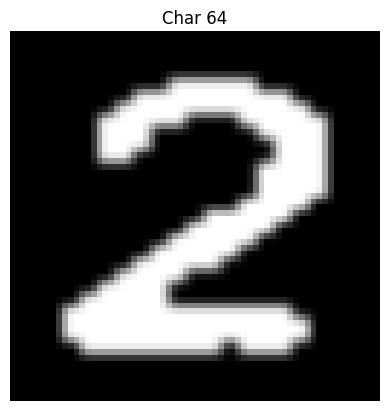

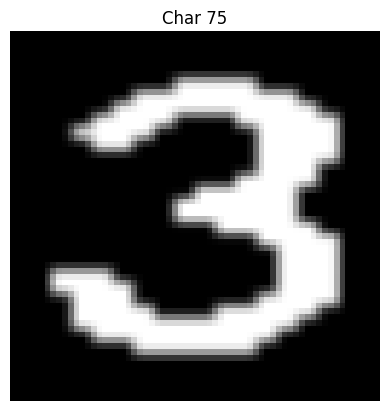

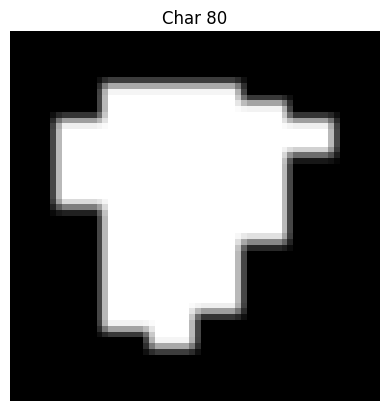

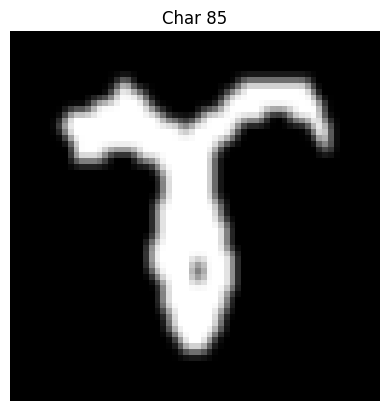

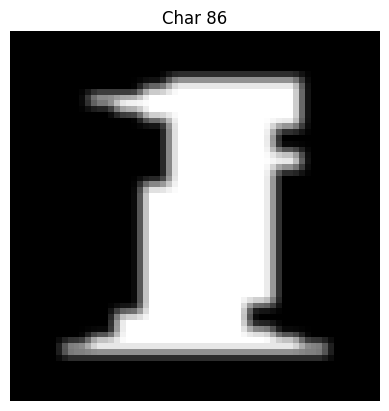

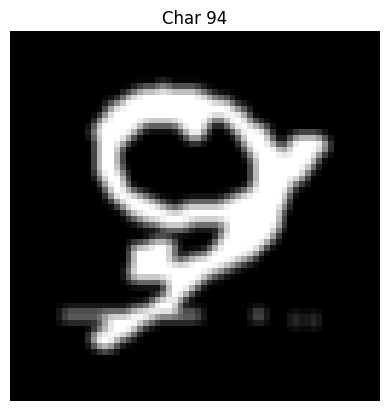

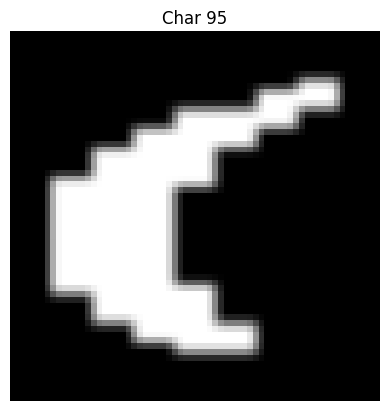

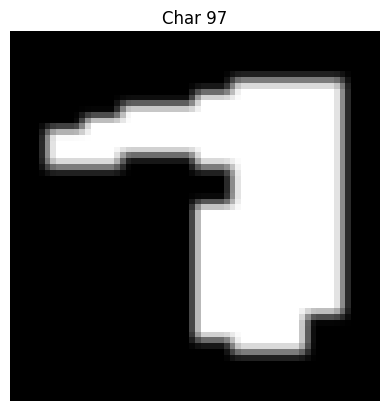

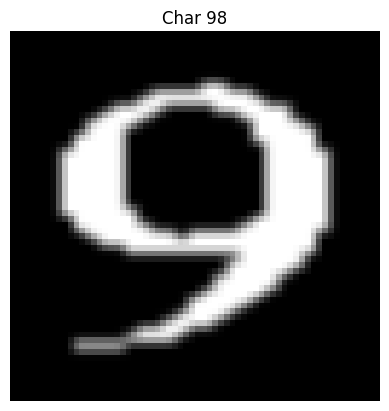

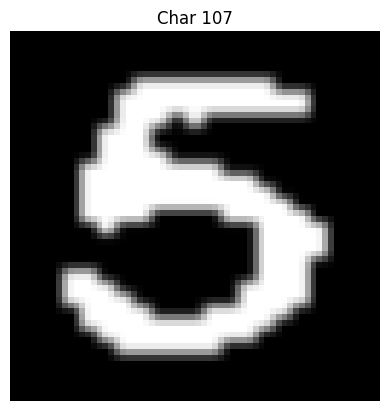

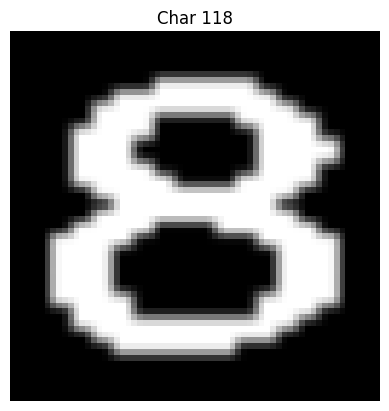

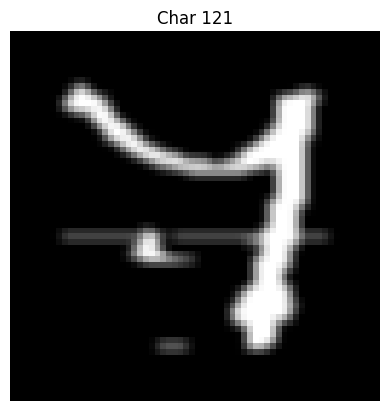

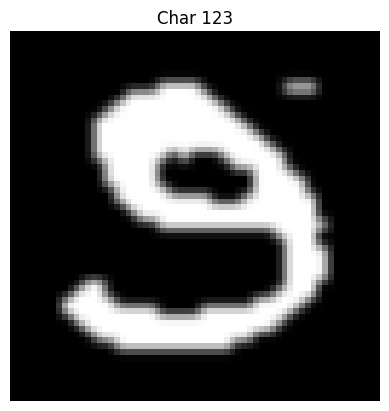

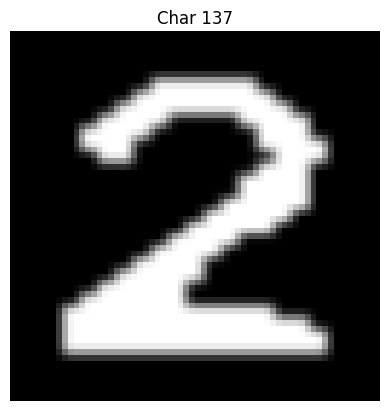

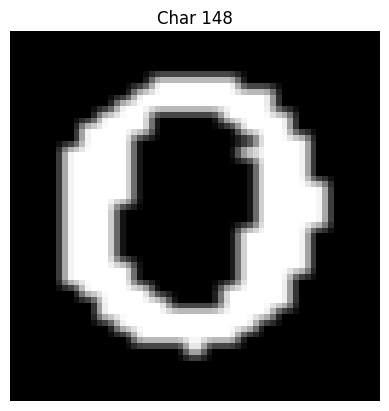

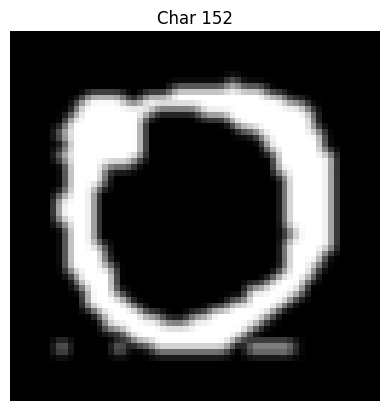

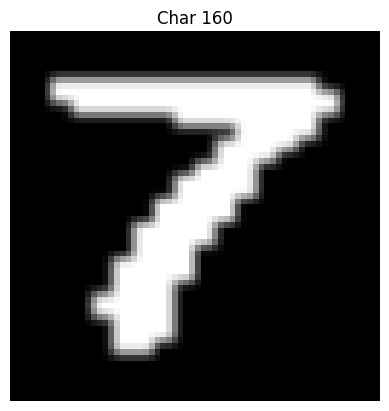

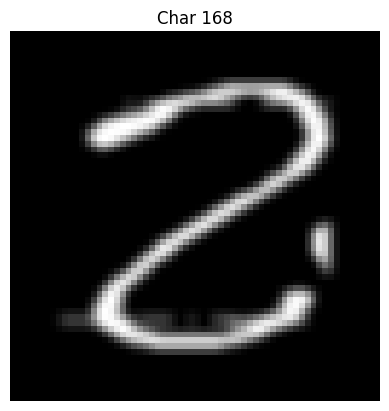

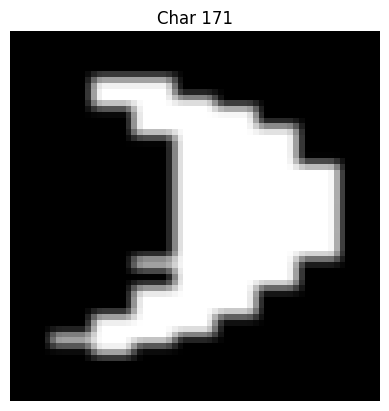

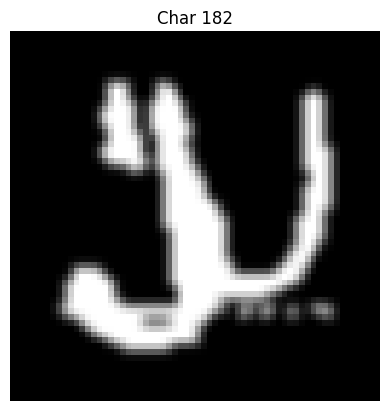

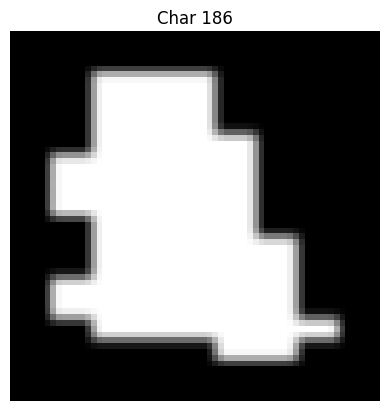

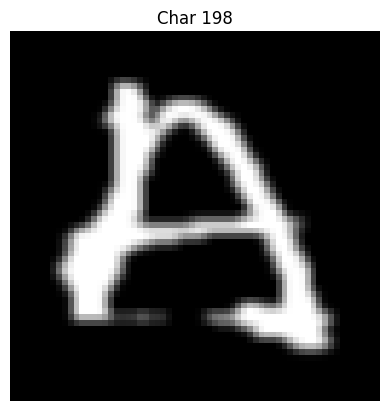

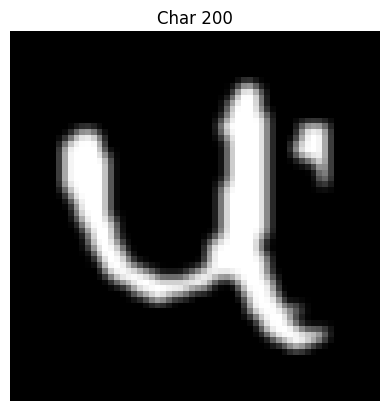

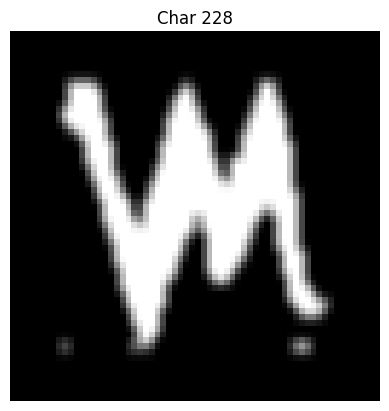

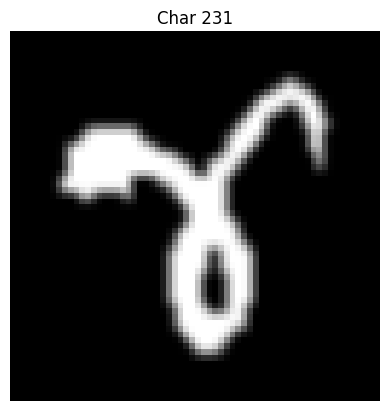

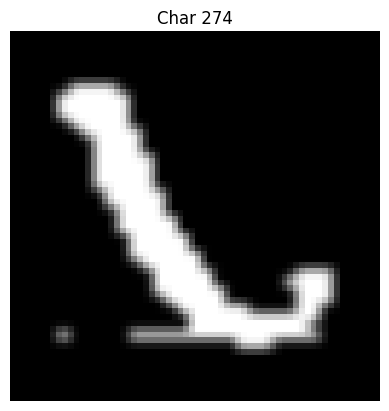

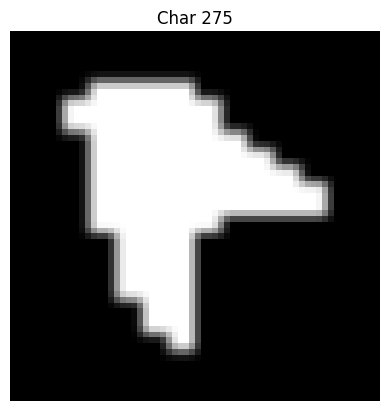

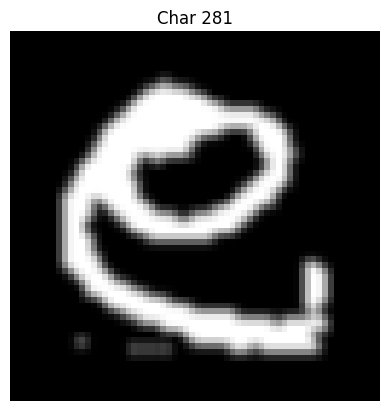

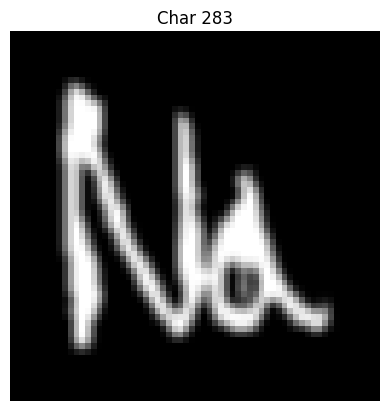

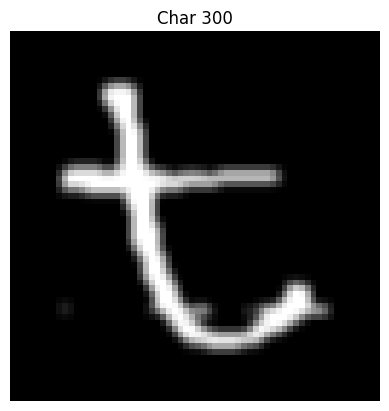

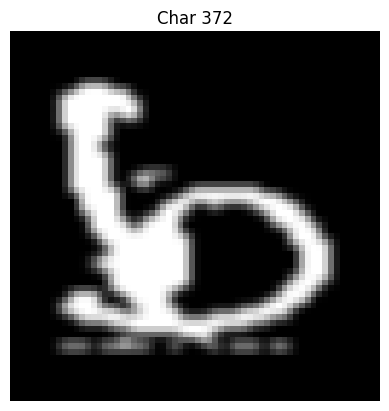

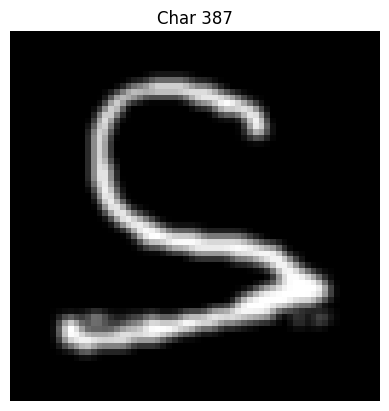

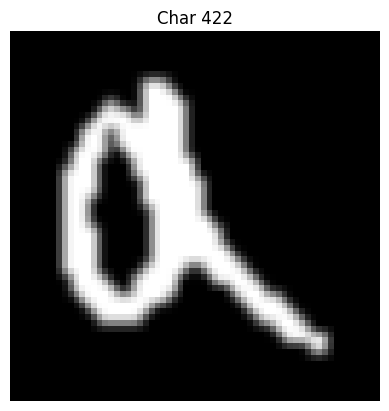

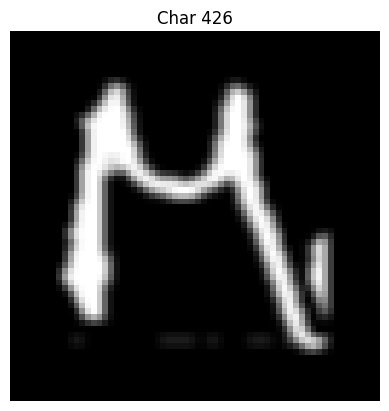

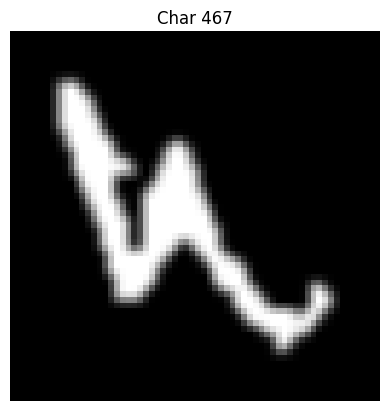

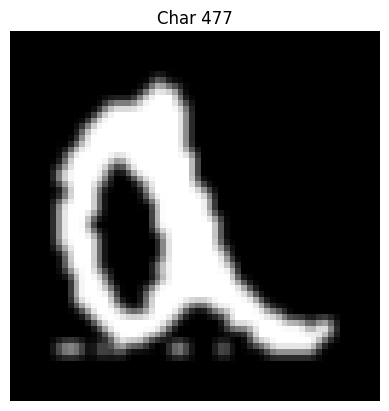

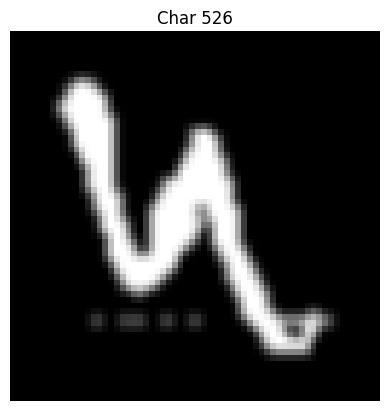

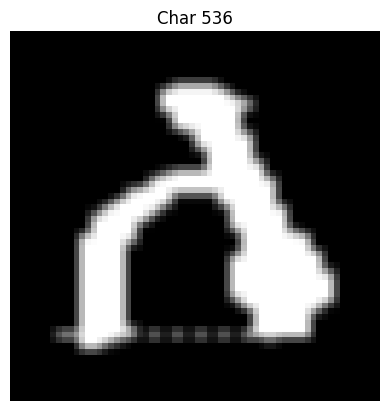

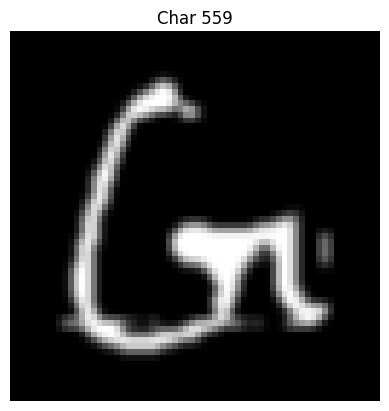

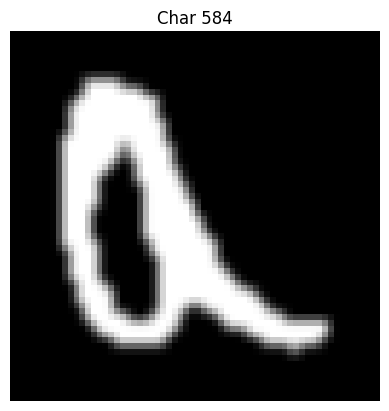

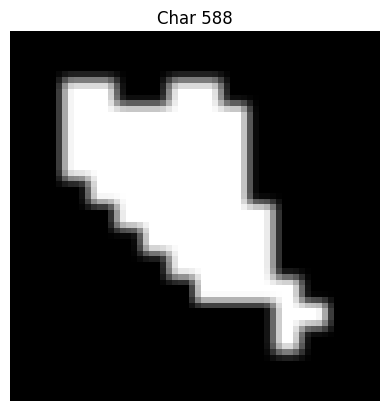

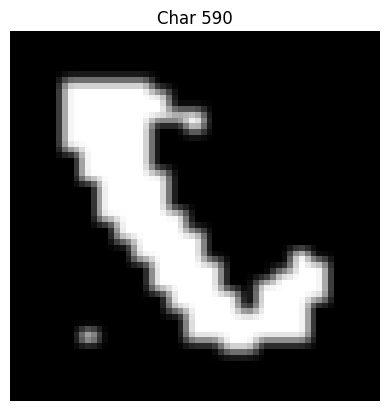

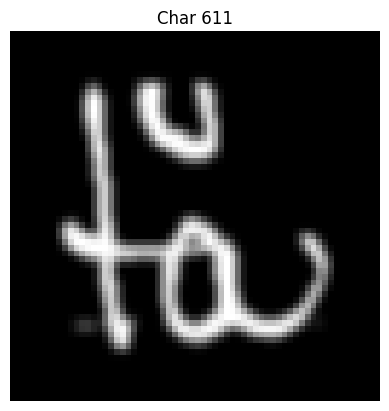

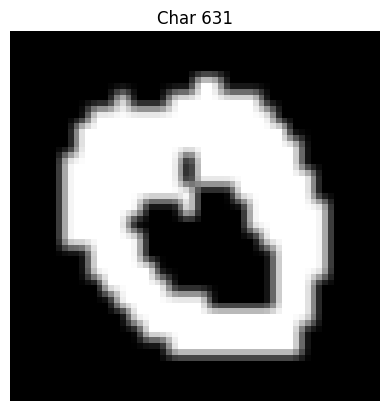

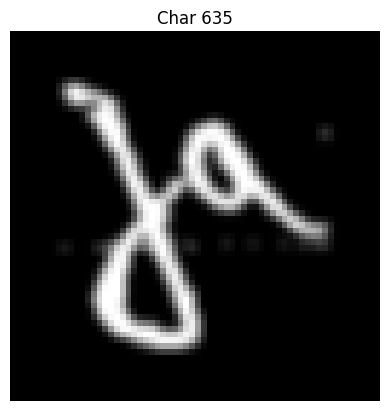

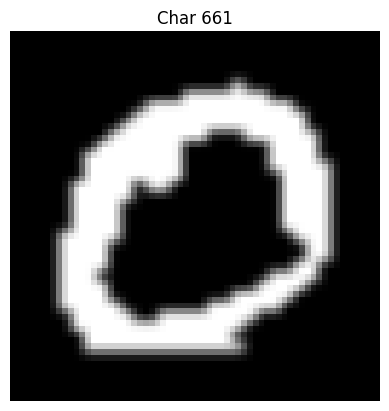

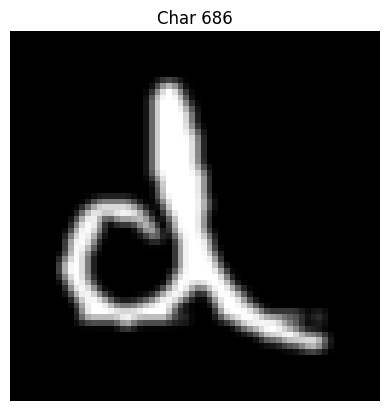

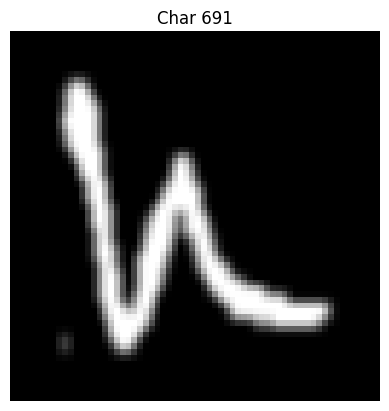

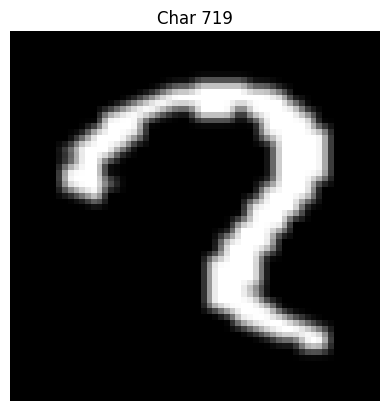

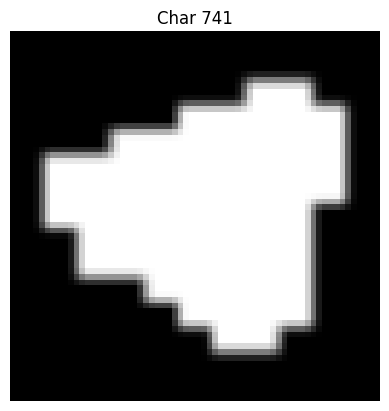

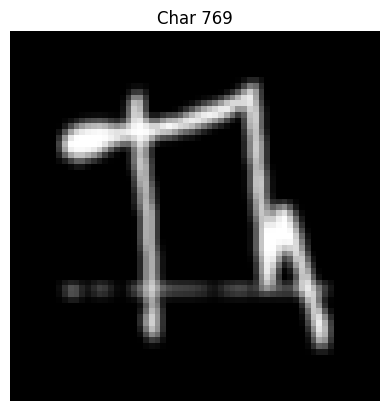

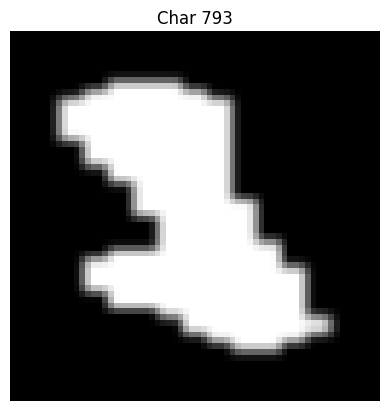

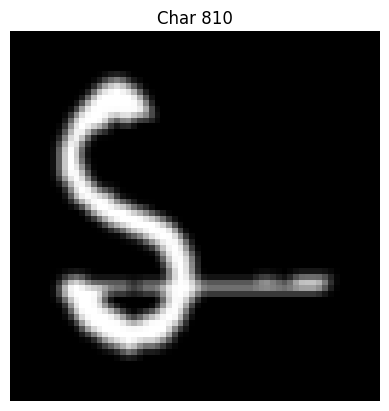

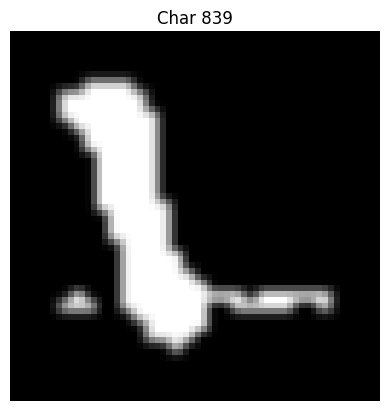

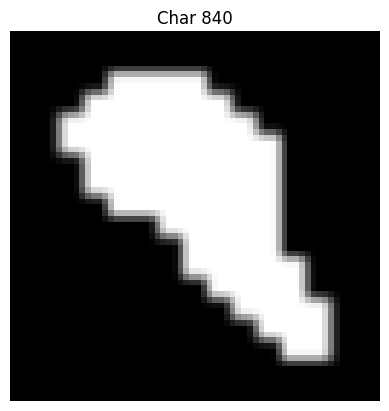

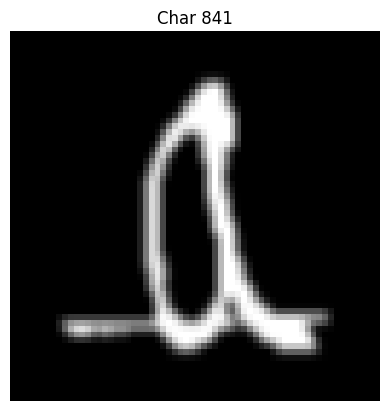

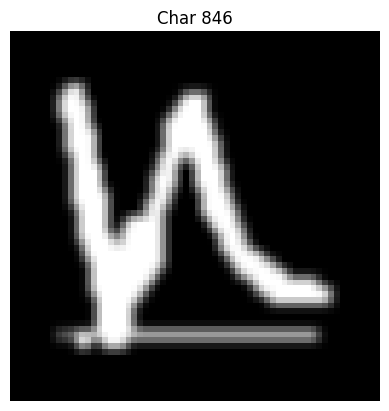

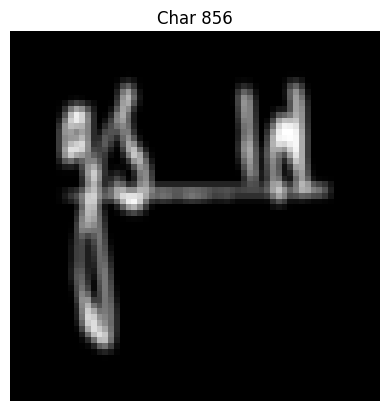

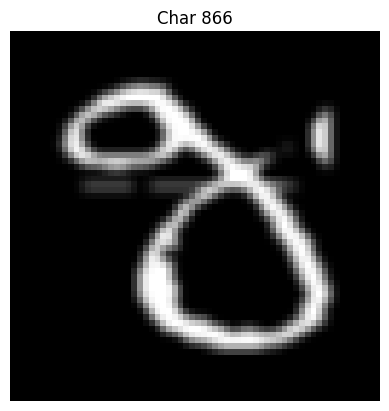

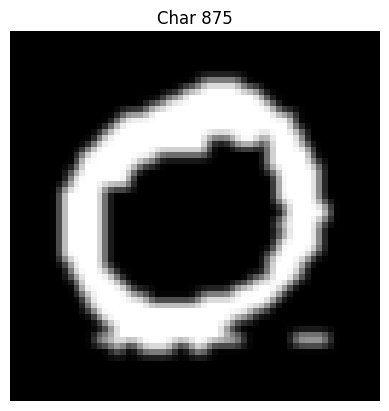

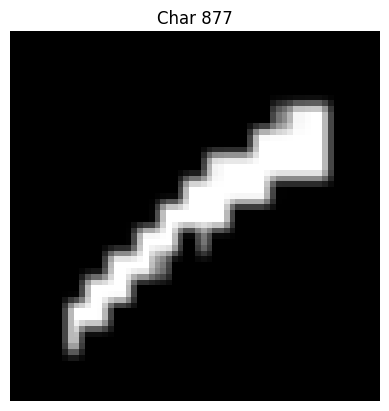

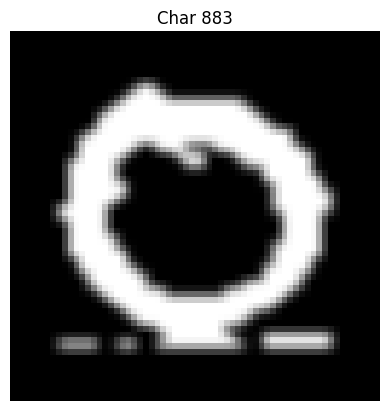

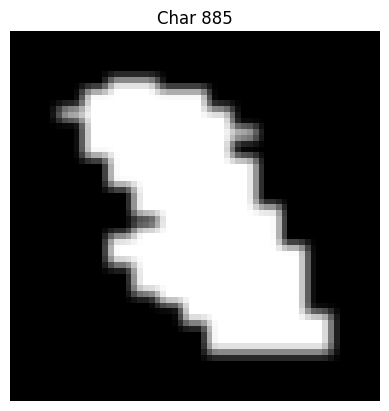

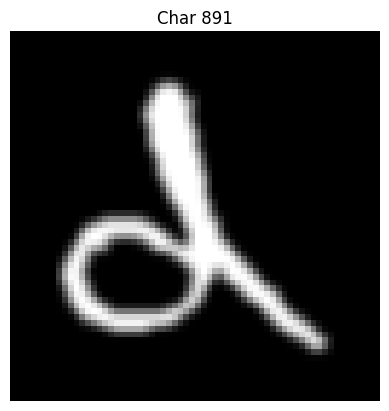

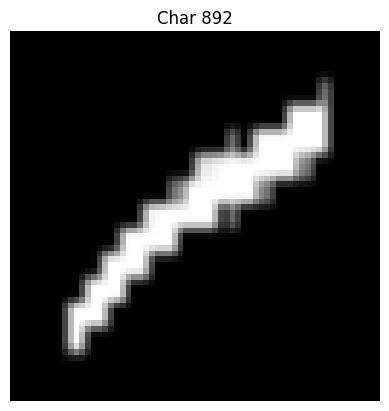

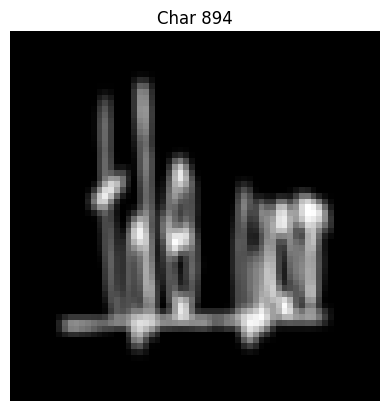

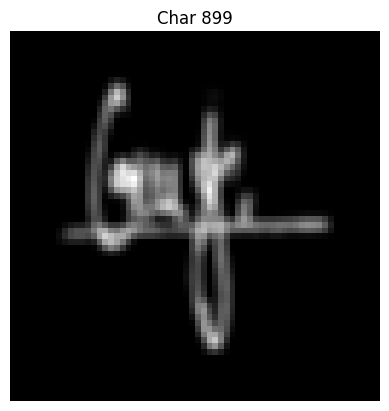

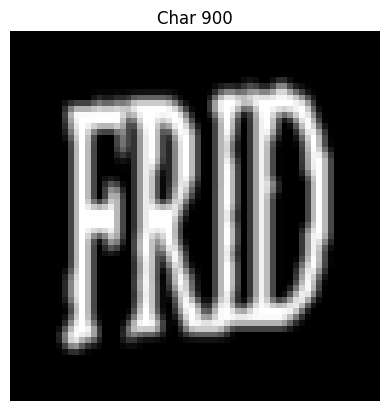

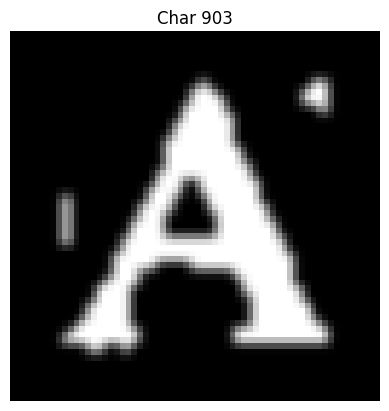

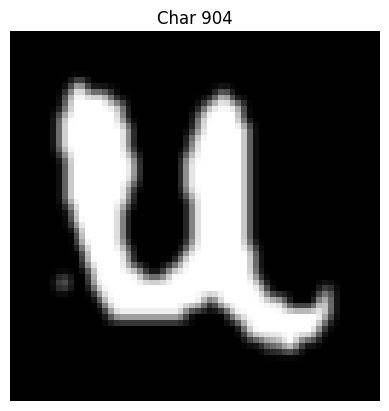

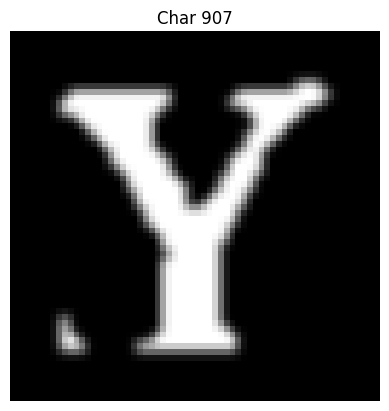

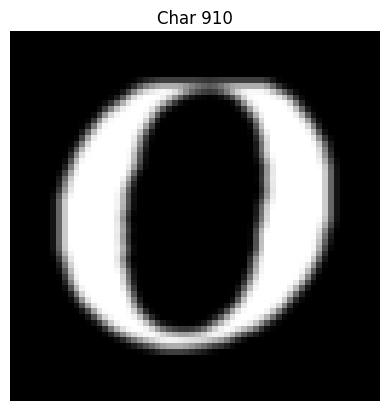

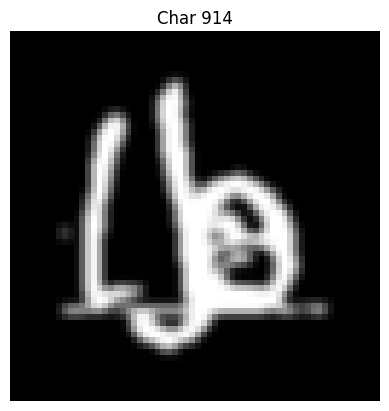

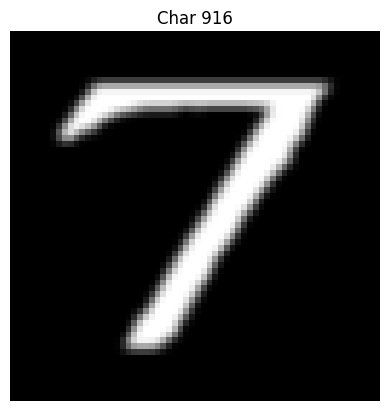

In [1]:
# Install required packages
!pip install opencv-python-headless matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

# Upload your image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Load and preprocess
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours left to right
def sort_contours(cnts):
    bounding_boxes = [cv2.boundingRect(c) for c in cnts]
    sorted_pairs = sorted(zip(cnts, bounding_boxes), key=lambda b: b[1][0])
    return [pair[0] for pair in sorted_pairs]

sorted_contours = sort_contours(contours)

# Output folder
os.makedirs("char_segments", exist_ok=True)

# Extract, pad, blur, and save
for i, cnt in enumerate(sorted_contours):
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 5 and h > 10:
        char = thresh[y:y+h, x:x+w]

        # Add padding (20% of width and height)
        pad_w = int(0.2 * w)
        pad_h = int(0.2 * h)
        padded = cv2.copyMakeBorder(char, pad_h, pad_h, pad_w, pad_w, borderType=cv2.BORDER_CONSTANT, value=0)

        # Resize to 64x64
        resized = cv2.resize(padded, (64, 64), interpolation=cv2.INTER_AREA)

        # Apply Gaussian blur for soft edges
        blurred = cv2.GaussianBlur(resized, (3, 3), sigmaX=1)

        # Save and show
        filename = f"char_segments/char_{i}.png"
        cv2.imwrite(filename, blurred)
        plt.imshow(blurred, cmap='gray')
        plt.title(f"Char {i}")
        plt.axis('off')
        plt.show()
